In [11]:
# import libararies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.20.0


In [3]:
# Load the data from keras dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()
print(train_image.shape, test_image.shape, test_labels.shape, train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (10000,) (60000,)


In [4]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

SyntaxError: invalid syntax (271955809.py, line 1)

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
plt.figure()
plt.imshow(train_image[0])
plt.grid(True)
plt.show()

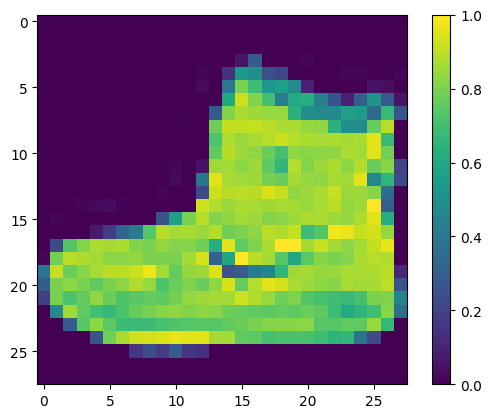

In [5]:
# min-max approach (Feature scaling with image dataset)-its mandatory steps in DNN/ANN
train_image = train_image/255.0
test_image = test_image/255.0

plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.show()

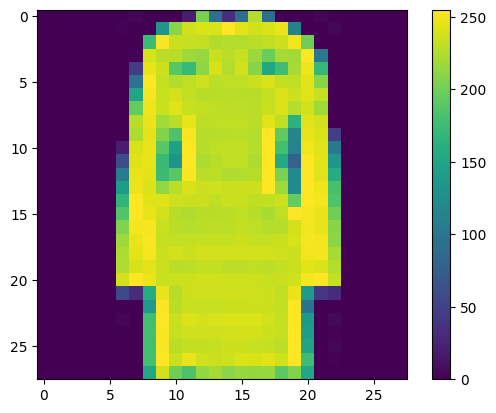

In [4]:
plt.figure()
plt.imshow(train_image[500])
plt.colorbar()
plt.show()

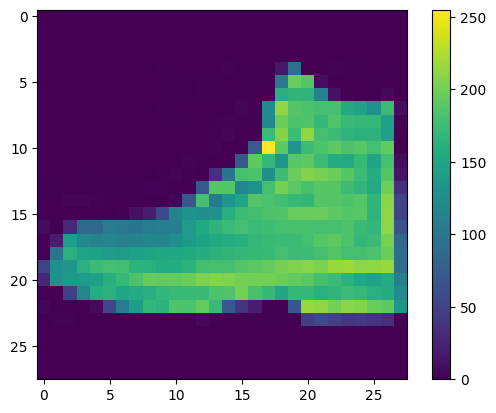

In [5]:
plt.figure()
plt.imshow(train_image[50000])
plt.colorbar()
plt.show()

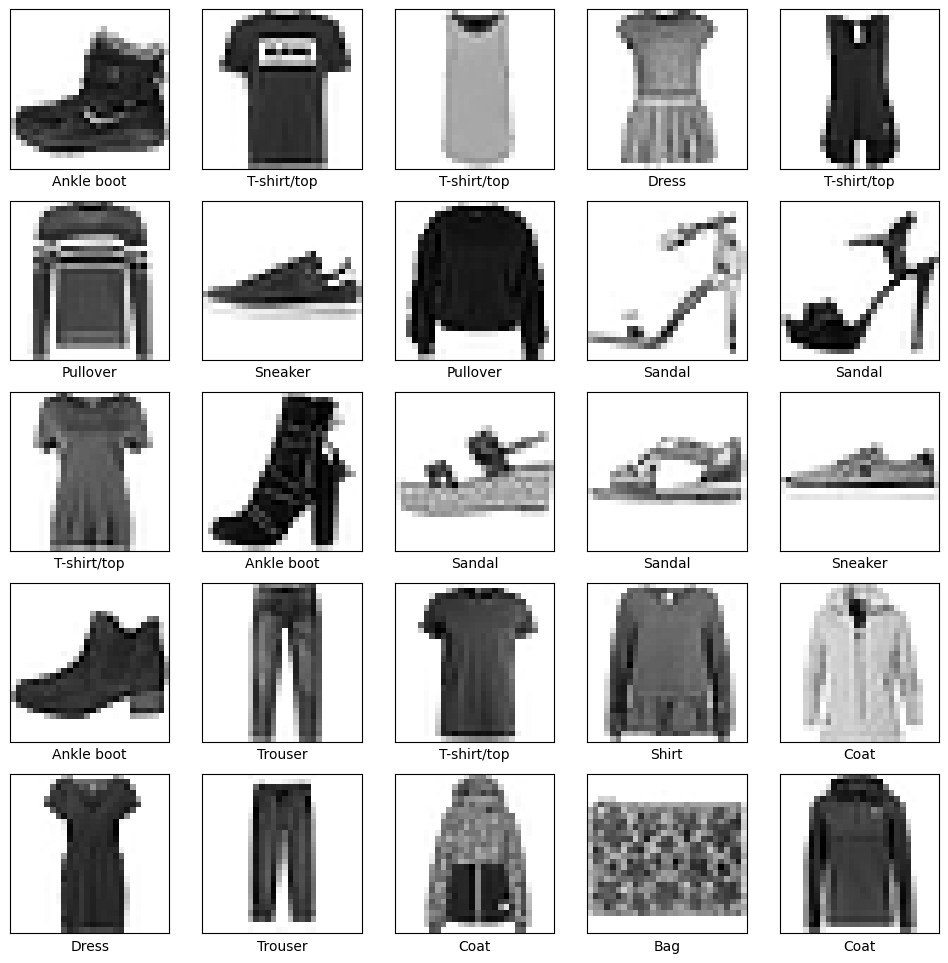

In [10]:
# let see a images

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i] , cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building multilayer perceptron model

In [6]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

In [7]:
moded = None

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

C:\Users\PTC-SW\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


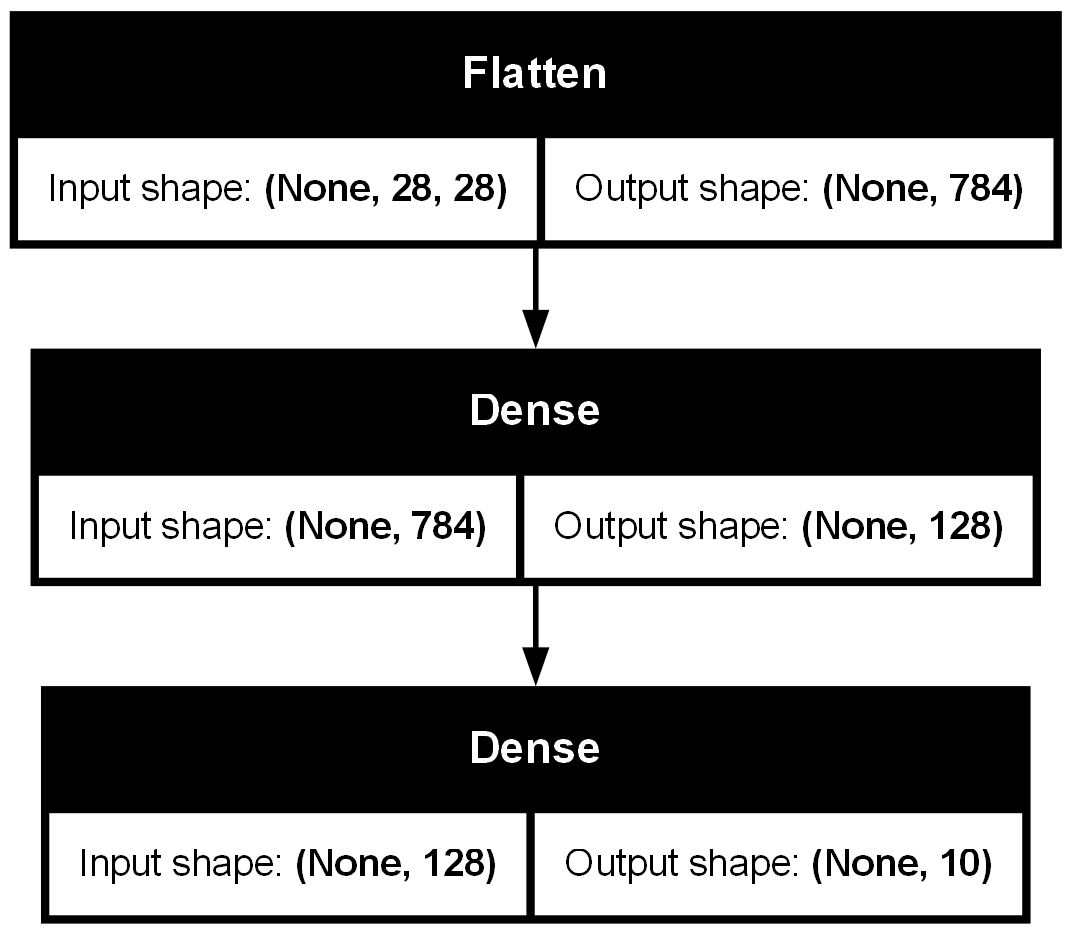

In [8]:
# summarize the model 
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png',show_shapes=True)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])